# AFM Digital Twin: Imperfect Probe Example

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pycroscopy/DTMicroscope/blob/main/notebooks/AFM/1_AFM_Imperfect_Probe_COLAB_Hackaton.ipynb)


## Task Overview

Participants are invited to develop methods for recovering the **"true" image** from SPM scans affected by probe artifacts, such as variable probe sizes and double tips.

---

### **Key Question**

> **Given a corrupted SPM image affected by probe artifacts, can we automatically detect these distortions and accurately reconstruct the original, undistorted image?**


# 1. Run server

In [ ]:
!pip install pyro5
!pip install scifireaders
!pip install sidpy
!pip install pynsid
!pip install git+https://github.com/pycroscopy/DTMicroscope.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.5/105.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.4 M

In [ ]:
!run_server_afm

You don't have igor2 installed.     If you wish to open igor files, you will need to install it     (pip install igor2) before attempting.
You don't have gwyfile installed.     If you wish to open .gwy files, you will need to      install it (pip install gwyfile) before attempting.
Server started and running in the background. Logs are being written to server.log.


# 2. Client side

In [ ]:
import matplotlib.pylab as plt
import numpy as np
import Pyro5.api
from IPython.display import clear_output, display

## 2.1 Get data

In [ ]:
!wget https://github.com/pycroscopy/DTMicroscope/raw/boris_dev/DTMicroscope/test/datasets/dset_spm1.h5

--2024-12-18 00:07:56--  https://github.com/pycroscopy/DTMicroscope/raw/boris_dev/DTMicroscope/test/datasets/dset_spm1.h5
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pycroscopy/DTMicroscope/boris_dev/DTMicroscope/test/datasets/dset_spm1.h5 [following]
--2024-12-18 00:07:56--  https://raw.githubusercontent.com/pycroscopy/DTMicroscope/boris_dev/DTMicroscope/test/datasets/dset_spm1.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22317256 (21M) [application/octet-stream]
Saving to: ‘dset_spm1.h5’

dset_spm1.h5        100%[===================>]  21.28M  71.9MB/s    in 0.3s    

2024-12-18 00:0

## 2.2 Register Data to the Digital twin

In [ ]:
uri = "PYRO:microscope.server@localhost:9092" #port for the AFM DT 9092
mic_server = Pyro5.api.Proxy(uri)
import sys

if 'google.colab' in sys.modules:
    mic_server.initialize_microscope("AFM", data_path = r"dset_spm1.h5")
else:
    mic_server.initialize_microscope("AFM", data_path = "../test/datasets/dset_spm1.h5")
mic_server.setup_microscope(data_source = 'Compound_Dataset_1')#upload dataset?
mic_server.get_dataset_info()

[('channels',
  ['Channel_000',
   'Channel_001',
   'Channel_002',
   'Channel_003',
   'Channel_004',
   'Channel_005',
   'Channel_006']),
 ('signals',
  ['HeightRetrace',
   'Amplitude1Retrace',
   'Amplitude2Retrace',
   'Phase1Retrace',
   'Phase2Retrace',
   'FrequencyRetrace',
   'Response']),
 ('units', ['m', 'm', 'm', 'deg', 'deg', 'm', 'a.u.']),
 ('scans', [0, 1, 2, 3, 4, 5]),
 ('spectra', []),
 ('point_clouds', [6])]

## Artefact 0: Blunt 'needle' with an offset tip

Generating Test Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_blunt_tip_artifact(mic_server, num_samples=50):
    """
    Generate a dataset for blunt tip artifacts.

    Parameters:
        mic_server: The microscope server proxy object.
        num_samples: Number of samples to generate.

    Returns:
        X (numpy.ndarray): Corrupted images (input to the model).
        y (numpy.ndarray): Reference images (target for the model).
    """
    X = []  # Corrupted images
    y = []  # Reference images

    for _ in range(num_samples):
        # Define blunt tip parameters
        r_tip = np.random.uniform(0.2, 0.8)  # Radius of the blunt tip
        center = [np.random.uniform(0.2, 0.8), np.random.uniform(0.2, 0.8)]  # Tip location

        # Create kwargs for blunt needle effect
        kwargs = {'effect': 'real_tip', 'r_tip': r_tip, 'center': center}
        mod_dict = [{'effect': 'real_tip', 'kwargs': kwargs}]

        # Get the original and corrupted scans
        array_list, shape, dtype = mic_server.get_scan(channels=['HeightRetrace'], modification=None)
        original = np.array(array_list, dtype=dtype).reshape(shape)
        array_list, shape, dtype = mic_server.get_scan(channels=['HeightRetrace'], modification=mod_dict)
        corrupted = np.array(array_list, dtype=dtype).reshape(shape)

        # Append to datasets
        X.append(corrupted[0])  # Corrupted image
        y.append(original[0])   # Reference image

    # Convert to numpy arrays and add an extra dimension for channels
    X = np.expand_dims(np.array(X), axis=-1)  # Shape: (num_samples, 256, 256, 1)
    y = np.expand_dims(np.array(y), axis=-1)  # Shape: (num_samples, 256, 256, 1)

    return X, y


X_train, y_train = generate_blunt_tip_artifact(mic_server, num_samples=100)
X_test, y_test = generate_blunt_tip_artifact(mic_server, num_samples=10)


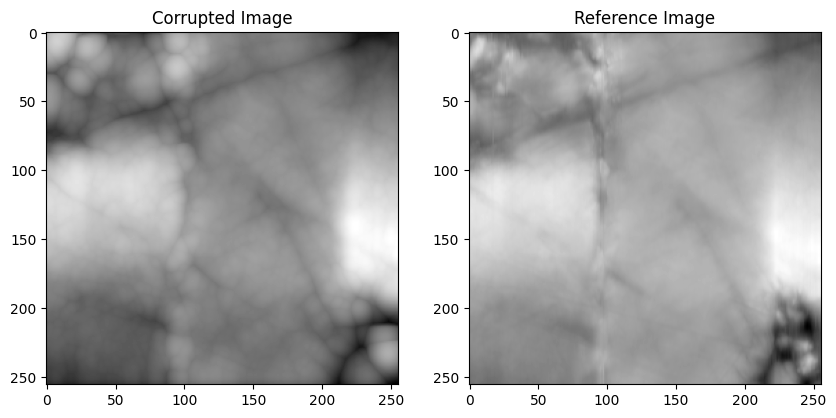

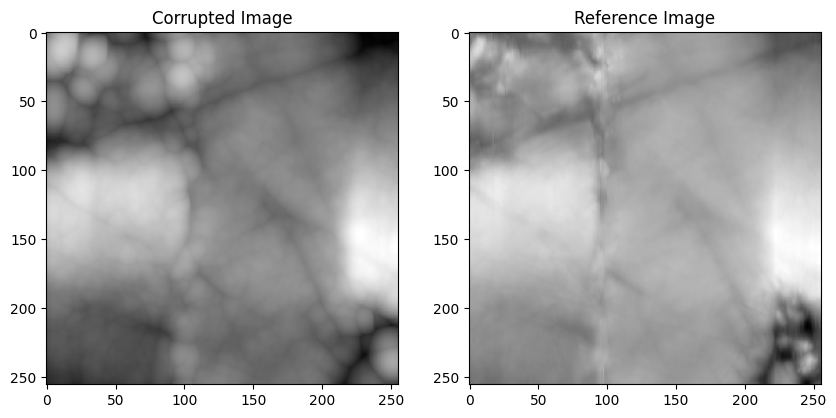

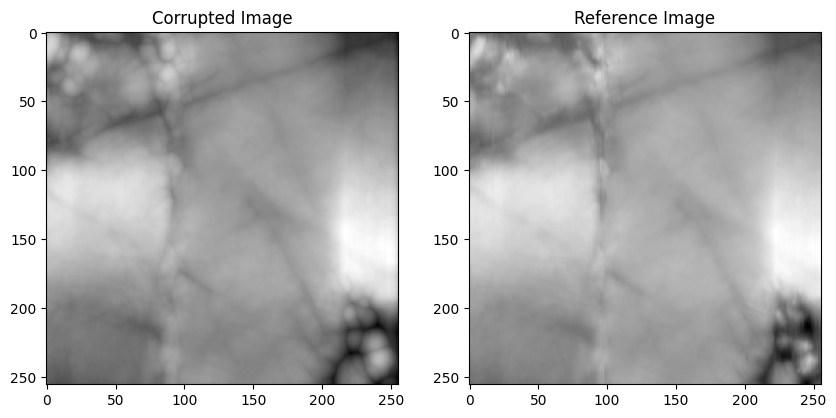

In [ ]:
# Visualize a few examples
for i in range(3):  # Display 3 samples
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Corrupted Image")
    plt.imshow(X_train[i].squeeze(), cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title("Reference Image")
    plt.imshow(y_train[i].squeeze(), cmap='gray')
    plt.show()


In [ ]:
print("X_train min:", X_train.min(), "X_train max:", X_train.max())
print("y_train min:", y_train.min(), "y_train max:", y_train.max())
print("X_test min:", X_test.min(), "X_test max:", X_test.max())
print("y_test min:", y_test.min(), "y_test max:", y_test.max())


X_train min: -6.758843152002317e-08 X_train max: 3.7251909749958944e-08
y_train min: -6.767368176952004e-08 y_train max: 3.7252561924105976e-08
X_test min: -4.4519498055274495e-08 X_test max: 3.725153176358449e-08
y_test min: -6.767368176952004e-08 y_test max: 3.7252561924105976e-08


In [ ]:
# Normalize the data to the range [0, 1]
X_train = (X_train - X_train.min()) / (X_train.max() - X_train.min())
y_train = (y_train - y_train.min()) / (y_train.max() - y_train.min())
X_test = (X_test - X_test.min()) / (X_test.max() - X_test.min())
y_test = (y_test - y_test.min()) / (y_test.max() - y_test.min())


In [ ]:
print("X_train min:", X_train.min(), "X_train max:", X_train.max())
print("y_train min:", y_train.min(), "y_train max:", y_train.max())
print("X_test min:", X_test.min(), "X_test max:", X_test.max())
print("y_test min:", y_test.min(), "y_test max:", y_test.max())


X_train min: 0.0 X_train max: 1.0
y_train min: 0.0 y_train max: 1.0
X_test min: 0.0 X_test max: 1.0
y_test min: 0.0 y_test max: 1.0


Loss Function

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
import tensorflow as tf

def gradient_loss(y_true, y_pred):
    # Compute gradients in x and y directions for true and predicted images
    grad_true_x = y_true[:, :, 1:, :] - y_true[:, :, :-1, :]
    grad_pred_x = y_pred[:, :, 1:, :] - y_pred[:, :, :-1, :]

    grad_true_y = y_true[:, 1:, :, :] - y_true[:, :-1, :, :]
    grad_pred_y = y_pred[:, 1:, :, :] - y_pred[:, :-1, :, :]

    # Calculate L1 difference of gradients
    loss_x = tf.reduce_mean(tf.abs(grad_true_x - grad_pred_x))
    loss_y = tf.reduce_mean(tf.abs(grad_true_y - grad_pred_y))

    return loss_x + loss_y

def combined_loss(y_true, y_pred):
    ssim_loss = 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))
    mae_loss = tf.reduce_mean(tf.abs(y_true - y_pred))
    grad_loss = gradient_loss(y_true, y_pred)

    return 0.4 * mae_loss + 0.4 * ssim_loss + 0.2 * grad_loss


Autoencoder Model

In [ ]:
inputs = layers.Input(shape=(256, 256, 1))

# Encoder
conv1 = layers.Conv2D(64, (3, 3), activation=layers.LeakyReLU(0.1), padding='same')(inputs)
pool1 = layers.MaxPooling2D((2, 2), padding='same')(conv1)

conv2 = layers.Conv2D(128, (3, 3), activation=layers.LeakyReLU(0.1), padding='same')(pool1)
pool2 = layers.MaxPooling2D((2, 2), padding='same')(conv2)

conv3 = layers.Conv2D(256, (3, 3), activation=layers.LeakyReLU(0.1), padding='same')(pool2)
pool3 = layers.MaxPooling2D((2, 2), padding='same')(conv3)

# Bottleneck with regularization
bottleneck = layers.Conv2D(
    512, (3, 3), activation=layers.LeakyReLU(0.1), padding='same',
    kernel_regularizer=regularizers.l2(1e-4)
)(pool3)

# Decoder with Skip Connections
up1 = layers.Conv2DTranspose(256, (5, 5), activation='relu', padding='same')(bottleneck)
up1 = layers.UpSampling2D((2, 2))(up1)
up1 = layers.Concatenate()([up1, conv3])

up2 = layers.Conv2DTranspose(128, (5, 5), activation='relu', padding='same')(up1)
up2 = layers.UpSampling2D((2, 2))(up2)
up2 = layers.Concatenate()([up2, conv2])

up3 = layers.Conv2DTranspose(64, (5, 5), activation='relu', padding='same')(up2)
up3 = layers.UpSampling2D((2, 2))(up3)
up3 = layers.Concatenate()([up3, conv1])

outputs = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up3)

# Compile Model
autoencoder = models.Model(inputs, outputs)
optimizer = Adam(learning_rate=1e-4)  # Lower learning rate
autoencoder.compile(optimizer=optimizer, loss=combined_loss)
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 64)   │            640 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 64)   │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 128)    │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 32, 32, 256)    │              0 │ conv2d_2[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 32, 32, 512)    │      1,180,160 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose          │ (None, 32, 32, 256)    │      3,277,056 │ conv2d_3[0][0]         │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d             │ (None, 64, 64, 256)    │              0 │ conv2d_transpose[0][0] │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 64, 64, 512)    │              0 │ up_sampling2d[0][0],   │
│                           │                        │                │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_1        │ (None, 64, 64, 128)    │      1,638,528 │ concatenate[0][0]      │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_1           │ (None, 128, 128, 128)  │              0 │ conv2d_transpose_1[0]… │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 128, 128, 256)  │              0 │ up_sampling2d_1[0][0], │
│ (Concatenate)             │                        │                │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_2        │ (None, 128, 128, 64)   │        409,664 │ concatenate_1[0][0]    │
│ (Conv2DTranspose)    

 Total params: 6,876,225 (26.23 MB)

 Trainable params: 6,876,225 (26.23 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = autoencoder.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=4,
    callbacks=[early_stopping]
)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 400s 16s/step - loss: 0.1480 - val_loss: 0.1198
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 441s 16s/step - loss: 0.1200 - val_loss: 0.0994
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 439s 16s/step - loss: 0.1031 - val_loss: 0.1037
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 385s 15s/step - loss: 0.0898 - val_loss: 0.0889
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 451s 16s/step - loss: 0.0816 - val_loss: 0.0914
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 438s 16s/step - loss: 0.0772 - val_loss: 0.0814
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 438s 15s/step - loss: 0.0732 - val_loss: 0.0871
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 449s 16s/step - loss: 0.0668 - val_loss: 0.0866
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 440s 16s/step - loss: 0.0675 - val_loss: 0.0821
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 438s 16s/step - loss: 0.0612 - val_loss: 0.0792
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 440s 15s/step - loss: 0.0599 - val_loss: 0.0837
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4

In [ ]:
test_loss = autoencoder.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 23s 23s/step - loss: 0.0260
Test Loss: 0.026013648137450218


In [ ]:
# Predict on test data
reconstructed_images = autoencoder.predict(X_test)

# Plot examples
def plot_results(index):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.title("Corrupted Image")
    plt.imshow(X_test[index].squeeze(), cmap='gray')

    plt.subplot(1, 3, 2)
    plt.title("Reference Image")
    plt.imshow(y_test[index].squeeze(), cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title("Reconstructed Image")
    plt.imshow(reconstructed_images[index].squeeze(), cmap='gray')
    plt.show()

# Show first 3 results
for i in range(3):
    plot_results(i)

# Compute SSIM Score
from skimage.metrics import structural_similarity as ssim
import numpy as np

def calculate_ssim(y_true, y_pred):
    ssim_values = []
    for true, pred in zip(y_true, y_pred):
        score = ssim(true.squeeze(), pred.squeeze(), data_range=1.0)
        ssim_values.append(score)
    return np.mean(ssim_values)

ssim_score = calculate_ssim(y_test, reconstructed_images)
print(f"Average SSIM Score: {ssim_score:.4f}")


In [ ]:
# Save the entire model
model.save('model.h5')

from google.colab import drive
drive.mount('/content/gdrive')

# Then specify the destination path in your Drive
model.save('/content/gdrive/MyDrive/model.h5')
